<a href="https://colab.research.google.com/github/Hercules2310/E_D_A/blob/main/eda_air_bnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - **EDA_AIR_BNB**


# Project Type    - EDA

# Created By      - PRINCE

#  Intern         - AlamBetter

# **Project Summary -**

This is an Exploratory Data Analysis of Air_bnb data from a business point of view and gaining insights such as ccustomer cost, popular choices, most sold out room_types, booking. This project shows an intake on factors affecting the hosting places price such as availability, nights, neighbourhood, room-type etc. this project also looks to find an opportunity regarding upselling and cross selling. This project helps the businesses to better understand their business model and their places requiring work in terms of generating revenue.

# **GitHub Link -**

Provide your GitHub Link here.- https://github.com/Hercules2310/E_D_A/blob/main/EDA_AIR_BNB.ipynb

# **Problem Statement**


**Looking for upselling opprtunities in air_bnb to increse commision, and looking to improve reputation**

#### **Define Your Business Objective?**

**To look for various business opportunities and market acquisition of each room-type and how to generate profit from this ?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Airbnb_NYC_2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('number of rows : ',df.shape[0])
print('number of columns : ',df.shape[1])

number of rows :  48895
number of columns :  16


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Visualizing the missing values
df[df.isna().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### What did you know about your dataset?

**After going through the basic information about the data, I have come to the conclusion that the data contains 48895 rows and 16 columns, comprises of 10074 rows containing null values for different column, has zero duplicated values**

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
df.select_dtypes(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,NaN
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,NaN


### Variables Description

The data set contains an overall of 16 columns, among which are 10 numerical and 6 categorical columns and 1 date column
> Numeric
1.  id	: representing the rows
2.  host_id : representing the unique id of each host
3.	latitude : as the name signifies(earth latitude)
4.	longitude : as the name signifies(earth longitude)
5.  price	: price of each lodging
6.  minimum_nights : minimum night available for booking theroughout the year
7.	number_of_reviews : Number of reviews by customers
8.	reviews_per_month : reviews each month
9.	calculated_host_listings_count : count of hostings under each unique host
10.	availability_365 : how many days is the hotel available throughout the year

> Categorical
1.  name : name of the inn/hotel/homestay
2.  host_name : name of the host, hosting the place
3.	neighbourhood_group : city located
4.	neighbourhood	: State
5.  room_type : private/share/house

> Date
1. last_review : last date according to data tha a guest left a review



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in ['neighbourhood_group','room_type','neighbourhood'] :   #unique values of only these groups would hold any values
  print('Column : ','\n',i.strip(),' Total_unique_values','\n',df[i].value_counts(),'\n',df[i].unique(),'\n')

Column :  
 neighbourhood_group  Total_unique_values 
 neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64 
 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 

Column :  
 room_type  Total_unique_values 
 room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64 
 ['Private room' 'Entire home/apt' 'Shared room'] 

Column :  
 neighbourhood  Total_unique_values 
 neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64 
 ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitche

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

In [15]:
# Dropping unnecessary variables to only keep meaningful data
df.drop(['host_name','name','last_review','host_id'],axis=1,inplace=True)

In [16]:
df.isna().sum()

id                                    0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
print('Revies per month rounded values : ',np.around(df['reviews_per_month']).unique())
print('max : ',np.around(df['reviews_per_month']).max())
print('min : ',np.around(df['reviews_per_month']).min())

Revies per month rounded values :  [ 0. nan  5.  1.  3.  2.  4.  7.  6. 10.  8.  9. 13. 12. 15. 11. 16. 14.
 20. 18. 17. 21. 58. 28.]
max :  58.0
min :  0.0


In [18]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)

In [19]:
df.isna().sum().sum()

0

In [20]:
df[df['price']<df['price'].quantile(0.95)].to_csv('new.csv')

### What all manipulations have you done and insights you found?

I have found some great insights in the form of null values present in data which I took care of, and have decided to drop a few columns containing confidential info such as host_id and name, last review_date

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='price', ylabel='Count'>

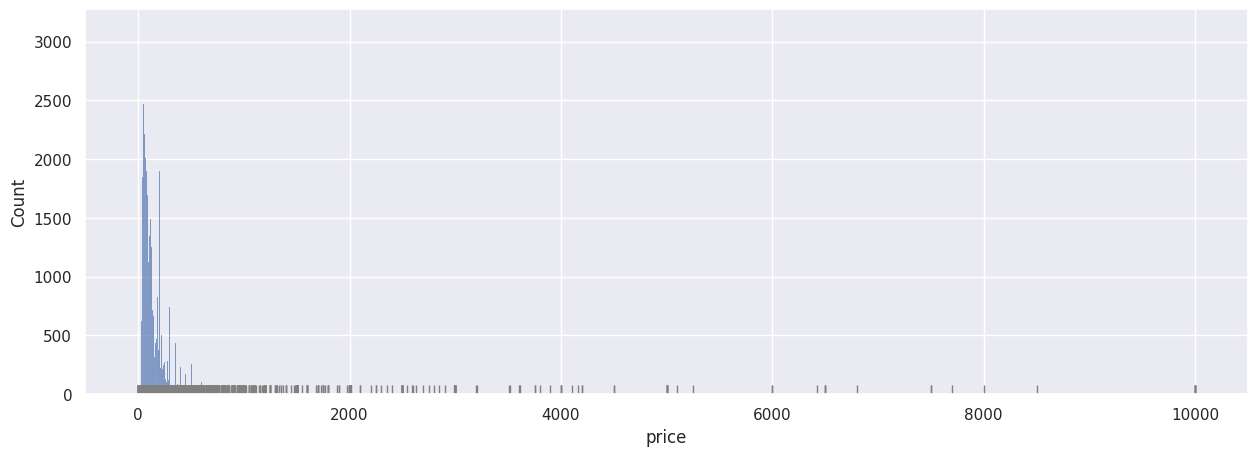

In [21]:
# Chart - 1 visualization code

# Following the CREAM principle state by Wu-Tong
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='price')
sns.rugplot(data=df,x='price',color='grey') # rugplot is just use to scale the unique values of price

(0.0, 320.0)

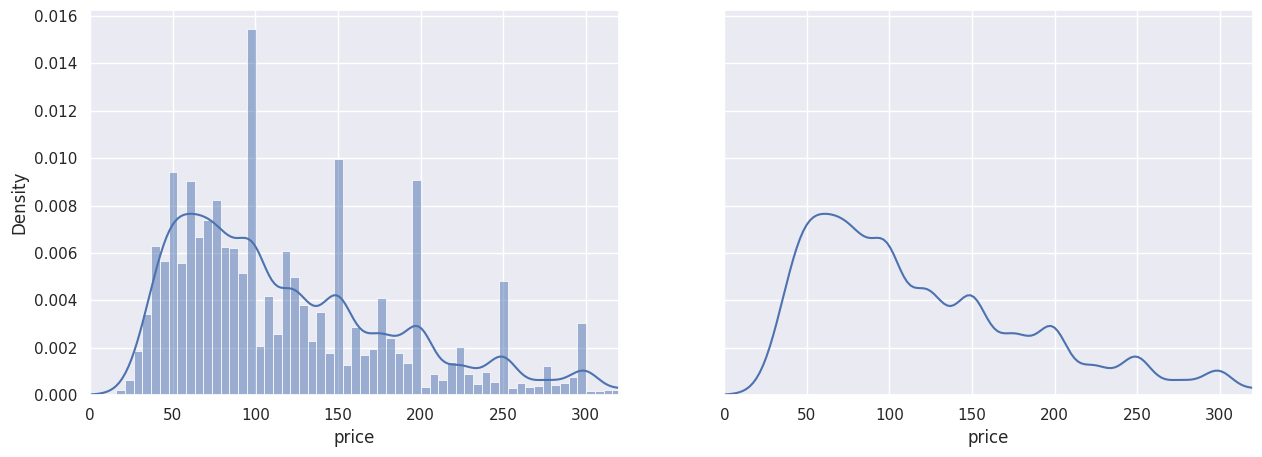

In [22]:
fig,axes=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.histplot(data=df[df['price']<df['price'].quantile(0.95)],x='price',kde=True,stat='density',ax=axes[0])
axes[0].set_xlim(0,320)
sns.kdeplot(data=df[df['price']<df['price'].quantile(0.95)],x='price',ax=axes[1])
axes[1].set_xlim(0,320)

##### 1. Why did you pick the specific chart?

A histogram is a perfect way to represent a single continuous variable againt frequency of its unique values.It is a univariate plot. It plays a very important role in normal repreasentation of variables. Another plot that i've used in this visual is rugplot which is used to show the scaling of values.

##### 2. What is/are the insight(s) found from the chart?

Key insights regarding column PRICE that I was able to get to was
1.   Occurence of too many outliers
2.   Asymmetric distribution of data
3.   Column is positively skewed
> All these insights points to the assumption that few places are overvalued and many places undervalued ar at a mid range that is affordable



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the business is blooming despite the high prices in that location we can figure out ways to raise the standards of each lodging that are registered directly through our site or somewhat in our jurisdiction and average range prices clustered together shows competition in location

#### Chart - 2

<Axes: xlabel='price'>

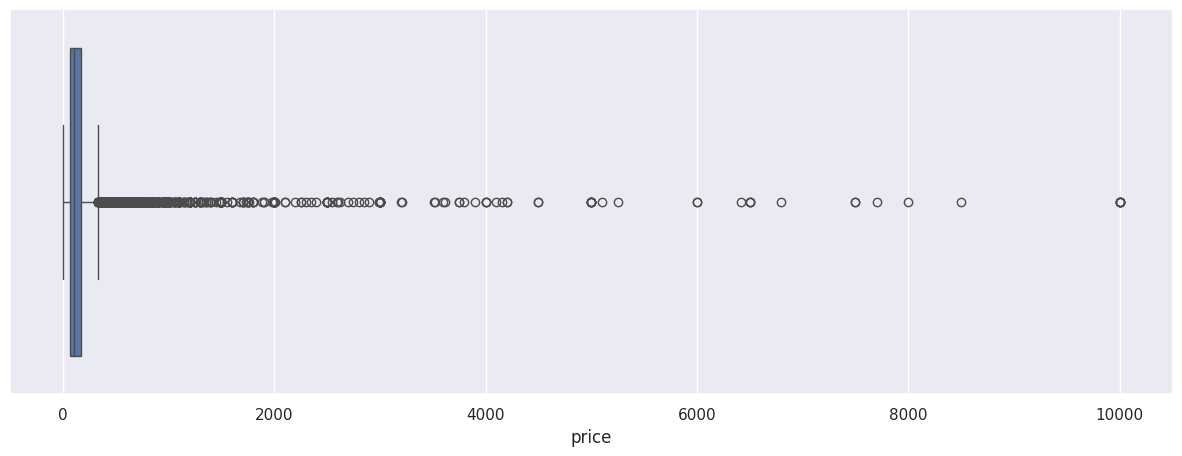

In [23]:
# Chart - 2 visualization code
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='price')

<Axes: xlabel='price'>

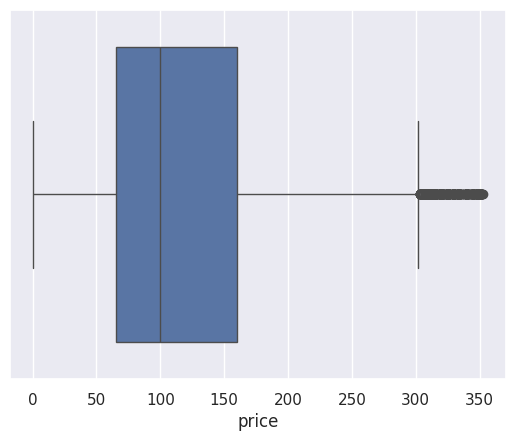

In [24]:
sns.boxplot(data=df[df['price']<df['price'].quantile(0.95)],x='price')

##### 1. Why did you pick the specific chart?

The Boxplot is perfect for identifying and detecting outliers and is a lot used in industry. Outliers are basically figures that stand against the crowd and tend to not follow the trend of the group.. Outliers has to be removed before feeding data in an algorithm.

##### 2. What is/are the insight(s) found from the chart?

Some pretty cool insights were obtained from this graph such as the presence of many outliers in price and the median is at the very bottom of the price, which means most of the prices are saturated towards the bottom of the range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the market is highly saturated, at the bottom, it coulb be only influenced by the competitions in market or a huge change in population such as covid disease

#### Chart - 3

<Axes: xlabel='room_type', ylabel='count'>

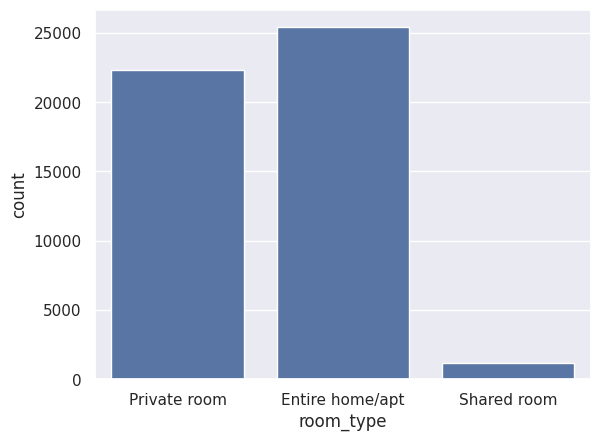

In [25]:
# Chart - 3 visualization code
sns.countplot(data=df,x='room_type')

##### 1. Why did you pick the specific chart?

Count plot is perfect for a visual overview of market and the needs of people. Additinaly it provides data for majority of customers preference for different room types.

##### 2. What is/are the insight(s) found from the chart?

A major insight that has come into view through this graph is that majority of people tend to book entire apartment and private rooms where as minority tend to book shared room.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight points to factor such as standars of share room are frowned upon and increasing cost for private rooms can come into play which generates an upselling opportunity for business

#### Chart - 4

<Axes: xlabel='neighbourhood_group', ylabel='count'>

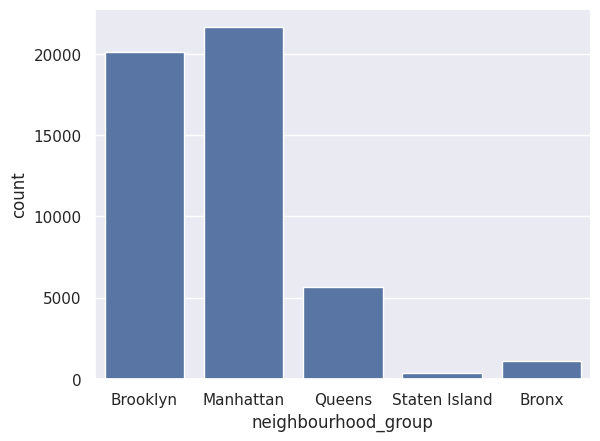

In [26]:
# Chart - 4 visualization code
sns.countplot(data=df,x='neighbourhood_group')

##### 1. Why did you pick the specific chart?

Count plot with respect to neighbourhood shows that the amount of bookings made in in particular areas and where there might be business opportunities left unexplored.

##### 2. What is/are the insight(s) found from the chart?

 Manhattan and Brooklyn is at its peak in buiness which can be due to the avilable market or opportunities such as employment, businesses in that area. On the other hand rest seems to be not doing very well with respect to hostings in their domain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights might help to look upon any area of unturned opportunities.

#### Chart - 5

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Williamsburg'),
  Text(1, 0, 'Bedford-Stuyvesant'),
  Text(2, 0, 'Harlem'),
  Text(3, 0, 'Bushwick'),
  Text(4, 0, 'Upper West Side'),
  Text(5, 0, "Hell's Kitchen"),
  Text(6, 0, 'East Village'),
  Text(7, 0, 'Upper East Side'),
  Text(8, 0, 'Crown Heights'),
  Text(9, 0, 'Midtown'),
  Text(10, 0, 'East Harlem'),
  Text(11, 0, 'Greenpoint'),
  Text(12, 0, 'Chelsea'),
  Text(13, 0, 'Lower East Side'),
  Text(14, 0, 'Astoria')])

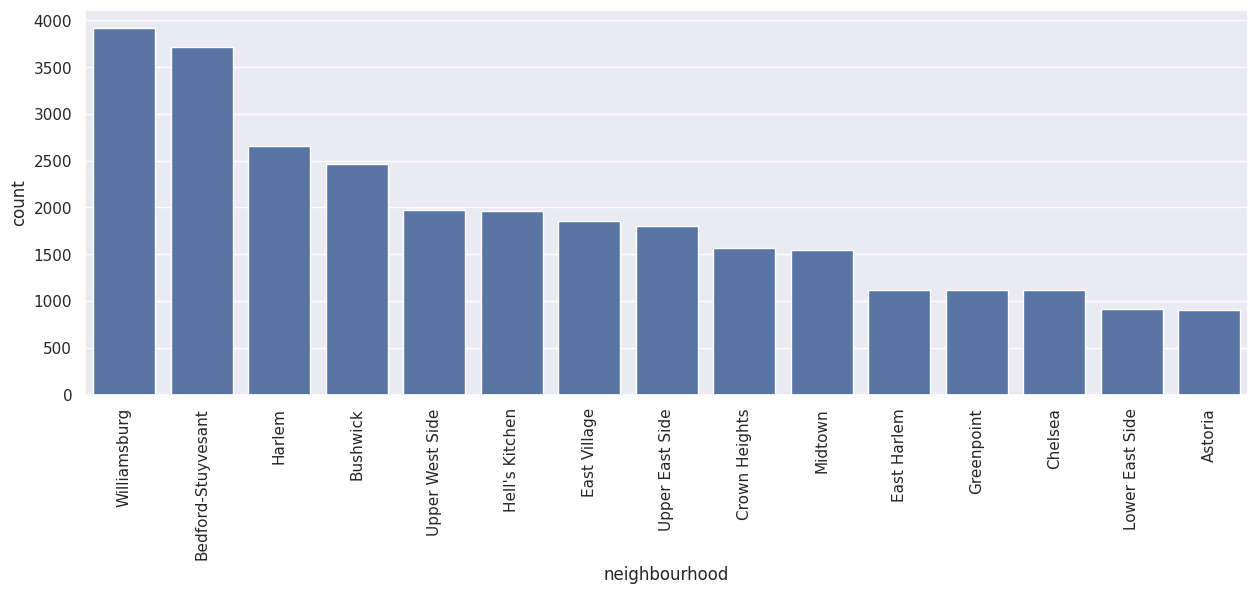

In [27]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
sns.barplot(data=df.groupby(['neighbourhood','neighbourhood_group'],as_index=False)['id'].count().sort_values('id',ascending=False).head(15),x='neighbourhood',y='id')
plt.ylabel('count')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Count plot is used to measure the instances of a single subcategory of variable.

##### 2. What is/are the insight(s) found from the chart?

Through the plot I,ve come to know the places with an active flourishing market places that can help us in better understanding business needs at a faster pace in the ever competitive market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will help us stay competitive in market and understand the market trend.

#### Chart - 6

Text(0, 0.5, 'neighbourhood group')

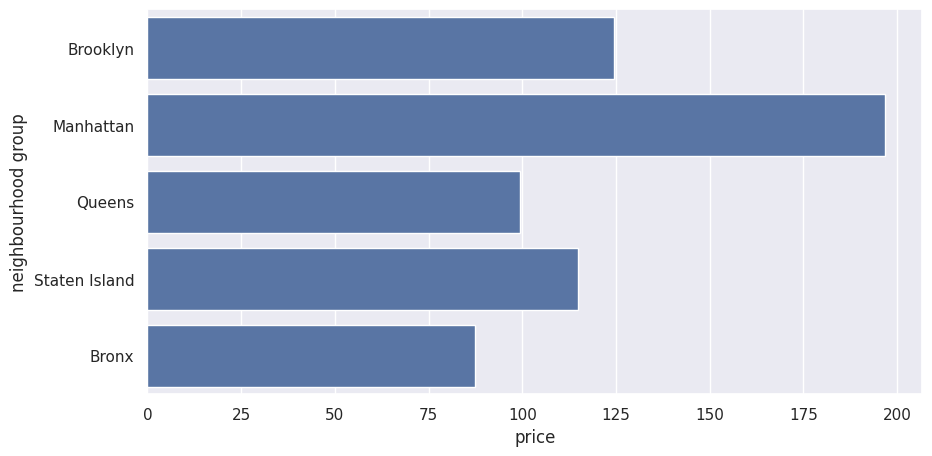

In [28]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.barplot(data=df,y='neighbourhood_group',x='price',estimator='mean',ci=None)
plt.ylabel('neighbourhood group')

##### 1. Why did you pick the specific chart?

Barplot is the pretty cool plot that is used to compare categorical data in bars with an estimator (can take values of aggregations). It is a bivariate plot.

---



##### 2. What is/are the insight(s) found from the chart?

This chart is used to show the average market rate in different places and the different revenue generated by each place. This also shows that the average cost of living in differet places cannot be compared by a single scale.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that Manhattan is a place with a fairly high cost of living so incresing charges. So for upskilling point of view, it is a good platform.

#### Chart - 7

<Axes: xlabel='price', ylabel='room_type'>

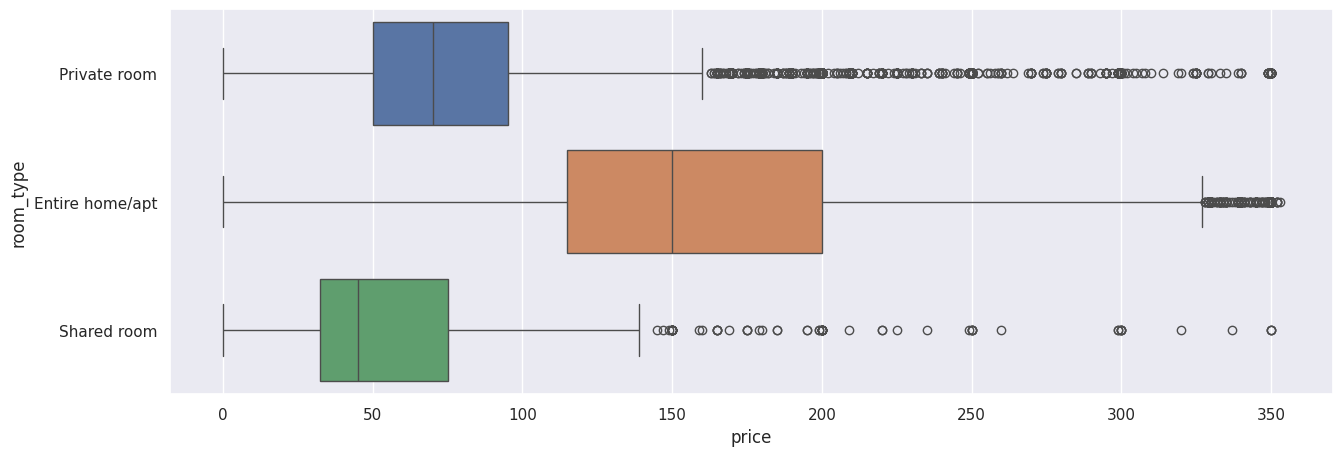

In [29]:
# Chart - 7 visualization code
plt.figure(figsize=(15,5))
sns.boxplot(data=df[df['price']<df['price'].quantile(0.95)],y='room_type',hue='room_type',x='price')

##### 1. Why did you pick the specific chart?

Boxplot is used to finding outliers and understanding the anomalies in data. The inner line in a inter-quartile box represents the median.

##### 2. What is/are the insight(s) found from the chart?

Bothe Private rooms and aprtments are collectively sought after by a vast majority of customers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The preference of apartments and private room priovides a key upselling opportunity from a business perspective.

#### Chart - 8

<Axes: xlabel='availability_365', ylabel='room_type'>

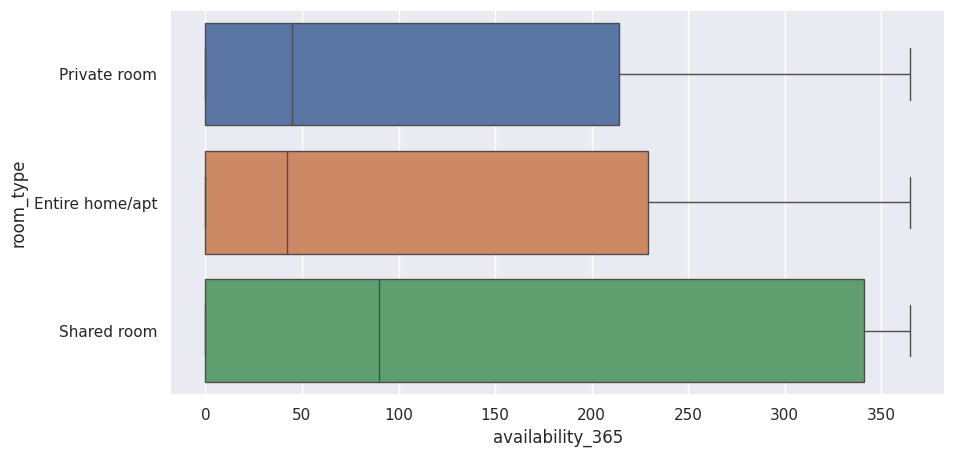

In [30]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(data=df,hue='room_type',x='availability_365',y='room_type')

##### 1. Why did you pick the specific chart?

Boxplot is used to detect and identify outliers and provides a view of data based on central tendency of mean.

##### 2. What is/are the insight(s) found from the chart?

An interesting insight that has come into picture is the availability of shared room being the max throughout the year despite being the one with the lowest cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The availability throughout the year plays a major role in deciding the overall revenue generated by customer's stay.

#### Chart - 9

<Axes: xlabel='price', ylabel='availability_365'>

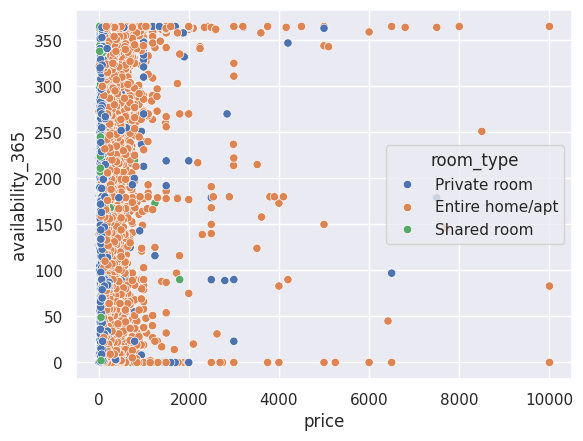

In [31]:
# Chart - 9 visualization code
sns.scatterplot(data=df,x='price',y='availability_365',hue='room_type')

##### 1. Why did you pick the specific chart?

Scatter plot is used to visualize the relation between two continuous variable.
it shows how variables are correlated to each other.

##### 2. What is/are the insight(s) found from the chart?

The shared rooms is hardly generating note worthy revenue being booked despite being available throughout the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Having too many shared rooms might be producing a reverse effect on customer's psychology, so for the purpose of giving it equal atention we can increse the standars for listing shared rooms.

#### Chart - 10

<Axes: xlabel='minimum_nights', ylabel='room_type'>

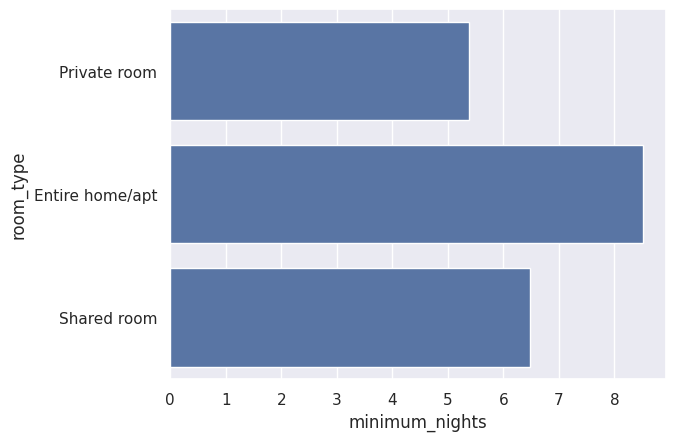

In [32]:
# Chart - 10 visualization code
sns.barplot(data=df,x='minimum_nights',y='room_type',estimator='mean',ci=None)

##### 1. Why did you pick the specific chart?

Bar plot is used to show comparision between categories.

##### 2. What is/are the insight(s) found from the chart?

On an average, minimum nights have been spent the min nights is in the apartments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is the average of minimum night stays. If the stay has been extended it would have a neutral to negative impact on the Bnb business as it won't generate a greater revenue in favour of Bnb.

#### Chart - 11

<Axes: xlabel='longitude', ylabel='latitude'>

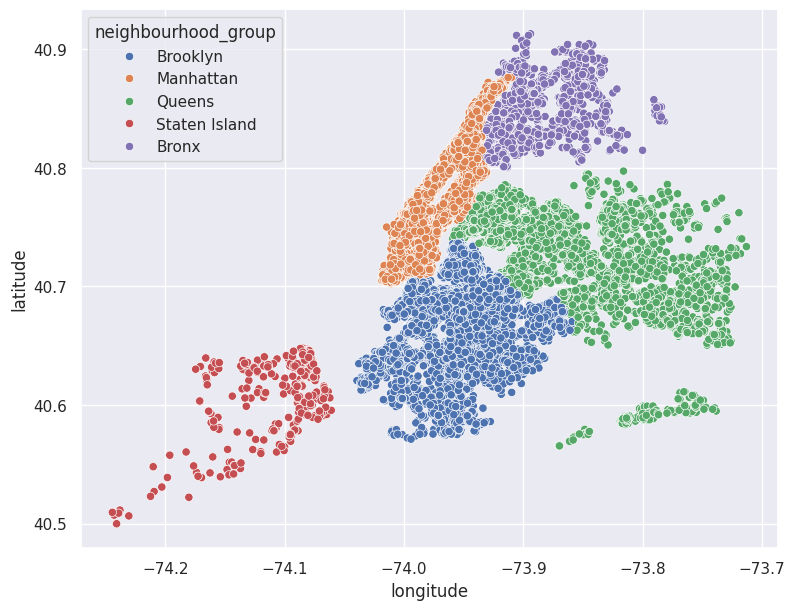

In [33]:
# Chart - 11 visualization code
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,y='latitude',x='longitude',hue='neighbourhood_group')

##### 1. Why did you pick the specific chart?

Scatter plot is used to show the relation between two continuous variables. It is perfect for showing realtion between the latitude and longitude to pin on map.



##### 2. What is/are the insight(s) found from the chart?

Through the plot we have come to understand the distribution of hosting places under the business

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart gives an overview of the distribution of various places.

#### Chart - 12

<Axes: xlabel='longitude', ylabel='latitude'>

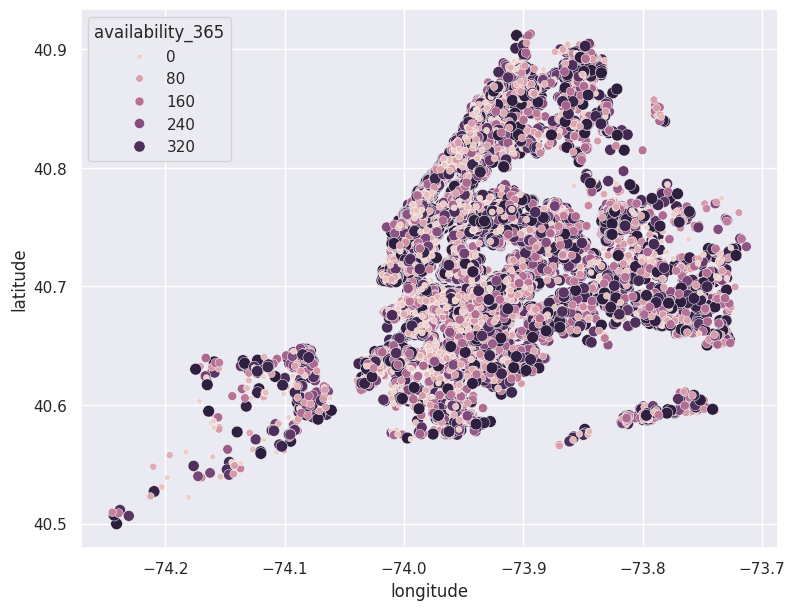

In [34]:
# Chart - 12 visualization code
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,y='latitude',x='longitude',hue='availability_365',size='availability_365')

##### 1. Why did you pick the specific chart?

Scatter plot with size is consiered bubble plot that is used to portray 3 dimensional structure where the third dimension is size of the bubbles.

##### 2. What is/are the insight(s) found from the chart?

Through the plot we have come to understand the availability of rooms under different places in New York city.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot can help us in implementing strategies according to availability of rooms in different areas which can help us reducing the resource cost in a particular areas.

#### Chart - 13

<Axes: xlabel='longitude', ylabel='latitude'>

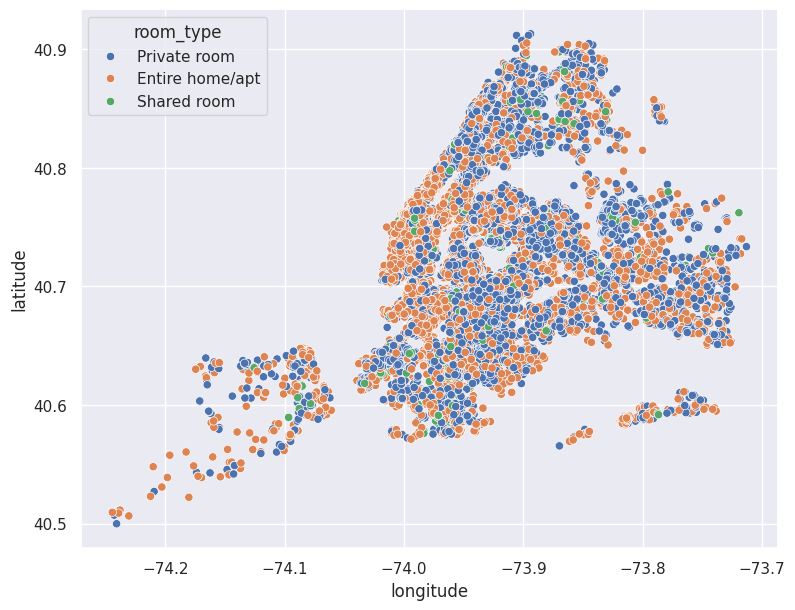

In [35]:
# Chart - 13 visualization code
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,y='latitude',x='longitude',hue='room_type')

##### 1. Why did you pick the specific chart?

Scatter plot is used to relation of loacations with respect to individual room types.

##### 2. What is/are the insight(s) found from the chart?

The distribution of room types is a major is a major concern when devising strategies for upselling in different regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gain insight will help the future strategies related to upselling.

#### Chart - 14 - Correlation Heatmap

<Axes: >

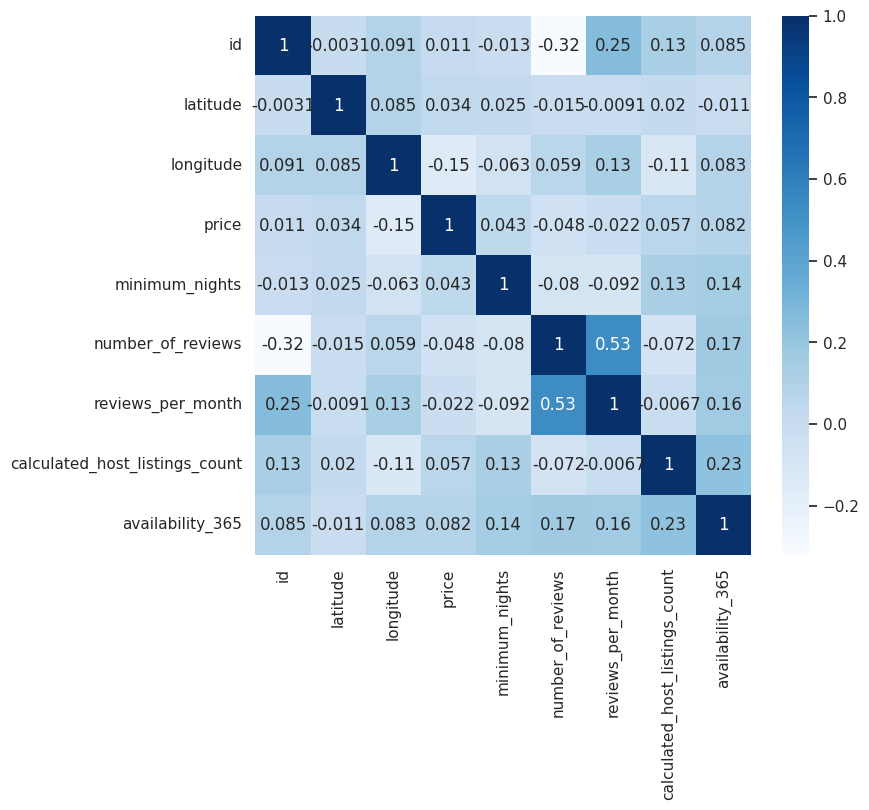

In [36]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,7))
sns.heatmap(data=df.select_dtypes(exclude='object').corr(),annot=True,cmap='Blues')

##### 1. Why did you pick the specific chart?

Heatmap tells the correlation between variable, which means the change that one variable will have with respect to another variables. Every correlation of two continuous variables ranges from -1 to 1, where as the relation approaches -1, we can say that one of the variable will be negatively impacted by any change in other variables. Zero represents that the variables are not related to each other wheras a relation approaching 1 shows that variables are related to each other and any change in one variable will reflect on the other variable.

##### 2. What is/are the insight(s) found from the chart?

The darker the color of grids, the more strongly their respective variables are related to each other.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df)

##### 1. Why did you pick the specific chart?

Pair plot is used to show relation between all numerical variables and how they interact with each other on a scatter plot and count plot of variable with iself. Pairplot and heatmap can collectively provide a great direction to work with data.

##### 2. What is/are the insight(s) found from the chart?

Through pairplot, i've come to know the relation that continuous variables have with each other and itself in a single visualization.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Through a majority of distribution we have come to understand the spread of data and explored many opportunities for upselling services to the customers such as using the opportunity of customer preference for private room to apartments.
High availability of shared rooms should be taken into consideration and increase the standards for shared rooms.
Places for testing should start with mid prices areas such as Queens which is ideal becase of its average count of customers and average revenue.

# **Conclusion**

This was a great project to explore the hosting market and a valuable dataset to learn a lot from.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***